In [ ]:
! pip install -q kaggle



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
! kaggle datasets list

ref                                                    title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                           29MB  2023-11-16 01:38:36           1160        127  1.0              
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data                   763KB  2023-11-21 17:56:32           4390         83  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset         LLM: 7 prompt training dataset                   41MB  2023-11-15 07:32:56           1451        112  1.0              
thedrcat/daigt-proper-train-dataset                    DAIGT Proper Train Dataset                      119MB  2023-11-05 14:0

In [ ]:
! kaggle datasets download -d amaralibey/gsv-cities

100% 21.8G/21.8G [03:40<00:00, 30.6MB/s]
100% 21.8G/21.8G [03:40<00:00, 106MB/s] 


In [ ]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial


import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
import zipfile
with zipfile.ZipFile("gsv-cities.zip", 'r') as zip_ref:
    zip_ref.extractall("")

In [ ]:
from sklearn.datasets import load_files
# from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm # progress bar

data_dir = "Images"
batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 150;
img_width = 150;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 529506 files belonging to 23 classes.
Using 423605 files for training.
Found 529506 files belonging to 23 classes.
Using 105901 files for validation.


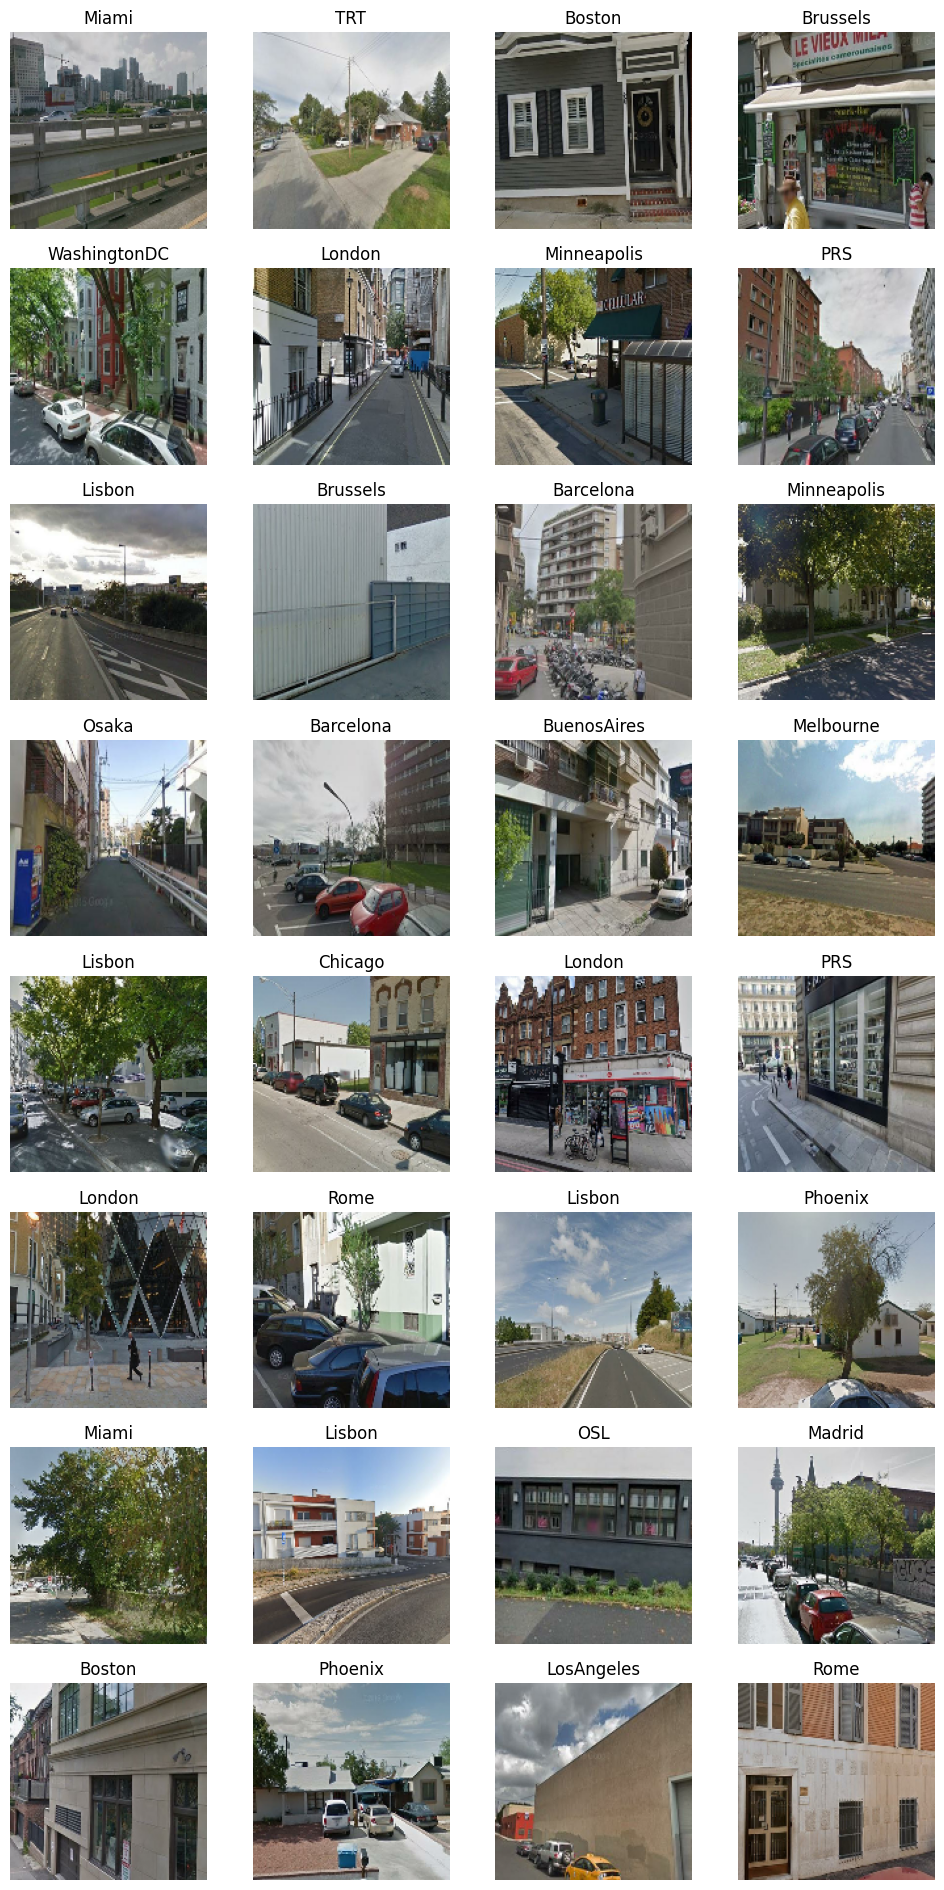

In [ ]:
# Visualize some of the train samples of one batch
# Make sure you create the class names that match the order of their appearances in the "files" variable
class_names = ['Bangkok', 'Barcelona', 'Boston', 'Brussels',
  'BuenosAires', 'Chicago', 'Lisbon', 'London', 'LosAngeles', 'Madrid',
  'Medellin', 'Melbourne', 'MexicoCity', 'Miami', 'Minneapolis', 'OSL',
  'Osaka', 'PRG', 'PRS', 'Phoenix', 'Rome', 'TRT', 'WashingtonDC']

# Rows and columns are set to fit one training batch (32)
n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

In [ ]:
!pip install keras
import keras
import keras.layers as layers
import tensorflow as tf
from keras.preprocessing import image
from tqdm import tqdm # progress bar
myModel  = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(23, activation='softmax')

])

myModel.summary()

myEpochs = 5
myOptimizer = 'adam'
myLoss = 'sparse_categorical_crossentropy'
myMetrics = ['accuracy']
myModel.compile(optimizer=myOptimizer, loss=myLoss, metrics=myMetrics)
history = myModel.fit(train_ds, validation_data=validation_ds,
                      epochs = myEpochs, callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                          tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True, monitor='val_accuracy'),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
                      ])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13238/13238 [==============================] - 1571s 118ms/step - loss: 2.4656 - accuracy: 0.2377 - val_loss: 2.3152 - val_accuracy: 0.2762 - lr: 0.0010
Epoch 2/5
13238/13238 [==============================] - 1521s 115ms/step - loss: 1.9323 - accuracy: 0.3876 - val_loss: 2.1934 - val_accuracy: 0.3698 - lr: 0.0010
Epoch 3/5
13238/13238 [==============================] - 1534s 116ms/step - loss: 1.6669 - accuracy: 0.4670 - val_loss: 1.9777 - val_accuracy: 0.4273 - lr: 0.0010
Epoch 4/5
13238/13238 [==============================] - 1541s 116ms/step - loss: 1.5553 - accuracy: 0.5008 - val_loss: 2.9603 - val_accuracy: 0.3319 - lr: 0.0010
Epoch 5/5
13238/13238 [==============================] - 1540s 116ms/step - loss: 1.4876 - accuracy: 0.5208 - val_loss: 2.1387 - val_accuracy: 0.4377 - lr: 0.0010


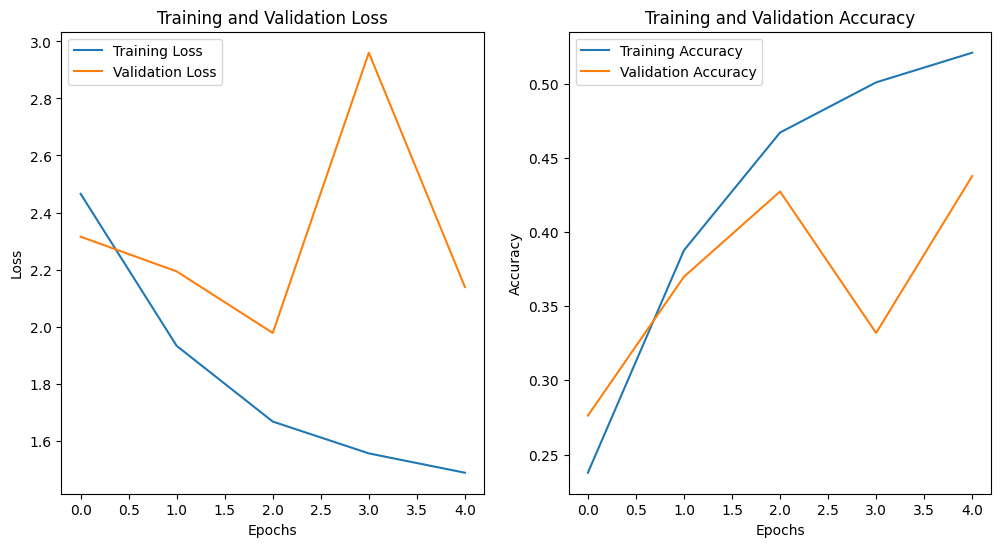

3310/3310 [==============================] - 297s 89ms/step - loss: 2.1387 - accuracy: 0.4377
Accuracy for myModel: 43.77%


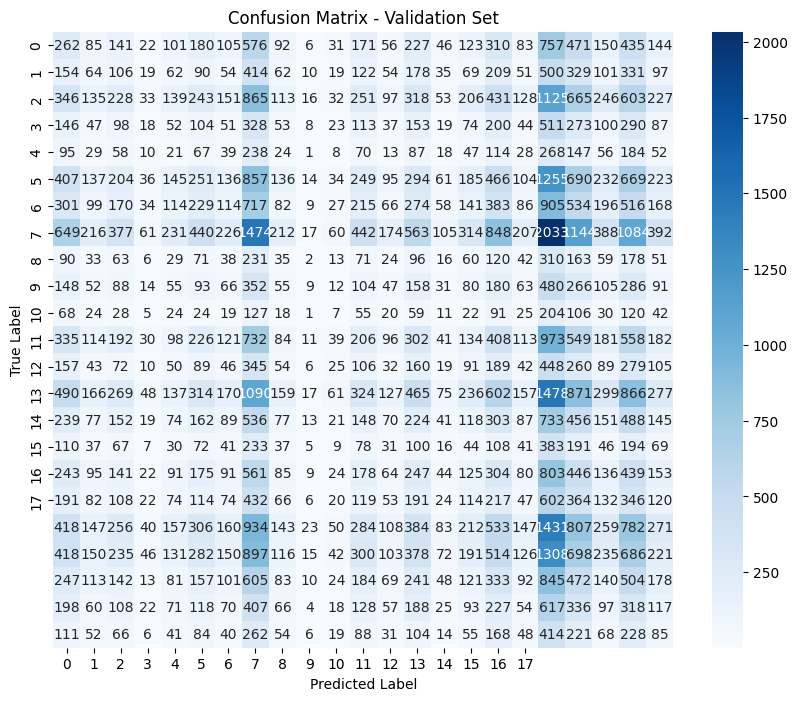

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
# Your evaluation code here
# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


validation_predictions = myModel.predict(validation_ds)
validation_labels = []
for _, labels in validation_ds:
    validation_labels.extend(labels.numpy())

# Your evaluation code here...

# Calculate validation accuracy
accuracy = myModel.evaluate(validation_ds)
print(f'Accuracy for myModel: {accuracy[1]*100:.2f}%')

# Generate confusion matrix on the validation set
conf_matrix = confusion_matrix(validation_labels, np.argmax(validation_predictions, axis=1))

# Display confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(18), yticklabels=range(18))
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()